Expectation (Mean): 145.67
Median: 144
Variance: 606.94
Standard Deviation: 24.64


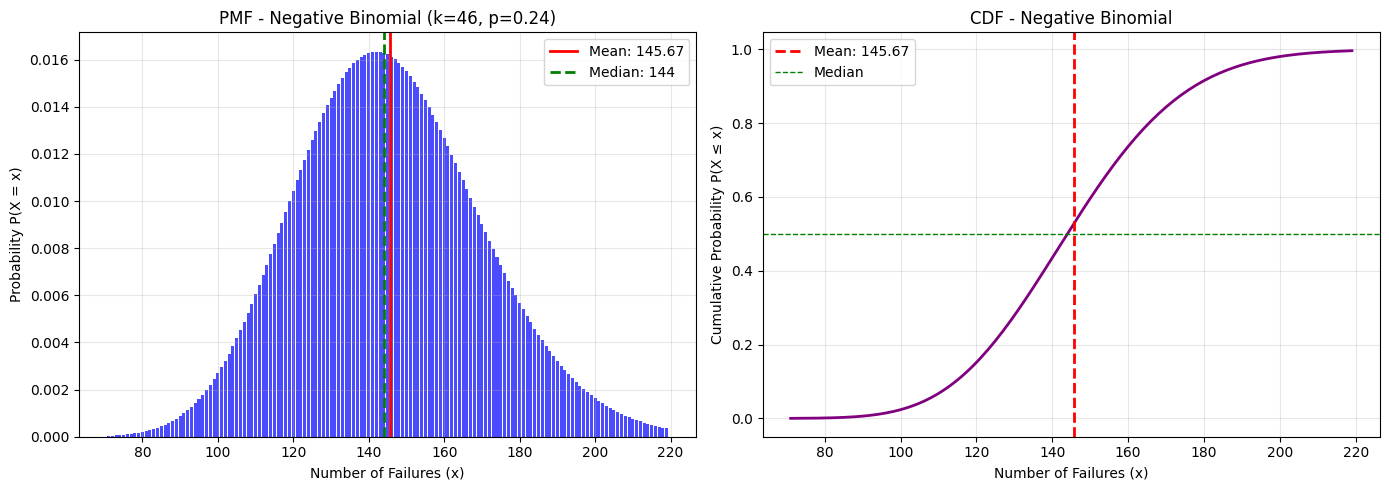


Probability Table (P(X=x) >= 0.5%)
x          P(X=x)          Percentage      Cumulative     
------------------------------------------------------------
108        0.005249        0.525          % 5.61           %
109        0.005636        0.564          % 6.17           %
110        0.006036        0.604          % 6.77           %
111        0.006447        0.645          % 7.42           %
112        0.006868        0.687          % 8.11           %
113        0.007299        0.730          % 8.84           %
114        0.007737        0.774          % 9.61           %
115        0.008181        0.818          % 10.43          %
116        0.008629        0.863          % 11.29          %
117        0.009080        0.908          % 12.20          %
118        0.009533        0.953          % 13.15          %
119        0.009985        0.998          % 14.15          %
120        0.010434        1.043          % 15.19          %
121        0.010879        1.088          % 16.28  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k = 46  # ξ₂ - number of successes
p = 0.24  # ξ₃ - probability of success

# Calculate statistics
expectation = k * (1 - p) / p
variance = k * (1 - p) / (p ** 2)
std_dev = np.sqrt(variance)

# Find median
x_range = np.arange(0, 300)
cdf_values = nbinom.cdf(x_range, k, p)
median = x_range[np.where(cdf_values >= 0.5)[0][0]]

print(f"Expectation (Mean): {expectation:.2f}")
print(f"Median: {median}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Generate data for plotting
x_min = max(0, int(expectation - 3*std_dev))
x_max = int(expectation + 3*std_dev)
x = np.arange(x_min, x_max + 1)

pmf = nbinom.pmf(x, k, p)
cdf = nbinom.cdf(x, k, p)

# Plot PMF and CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# PMF
ax1.bar(x, pmf, alpha=0.7, color='blue')
ax1.axvline(expectation, color='red', linewidth=2, label=f'Mean: {expectation:.2f}')
ax1.axvline(median, color='green', linewidth=2, linestyle='--', label=f'Median: {median}')
ax1.set_xlabel('Number of Failures (x)')
ax1.set_ylabel('Probability P(X = x)')
ax1.set_title('PMF - Negative Binomial (k=46, p=0.24)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# CDF
ax2.plot(x, cdf, color='purple', linewidth=2)
ax2.axvline(expectation, color='red', linewidth=2, linestyle='--', label=f'Mean: {expectation:.2f}')
ax2.axhline(0.5, color='green', linewidth=1, linestyle='--', label='Median')
ax2.set_xlabel('Number of Failures (x)')
ax2.set_ylabel('Cumulative Probability P(X ≤ x)')
ax2.set_title('CDF - Negative Binomial')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print probability table for P(X=x) >= 0.5%
print("\n" + "="*60)
print("Probability Table (P(X=x) >= 0.5%)")
print("="*60)
print(f"{'x':<10} {'P(X=x)':<15} {'Percentage':<15} {'Cumulative':<15}")
print("-"*60)

for i, xi in enumerate(x):
    if pmf[i] >= 0.005:  # 0.5%
        marker = " (Median)" if xi == median else ""
        print(f"{xi:<10} {pmf[i]:<15.6f} {pmf[i]*100:<15.3f}% {cdf[i]*100:<15.2f}%{marker}")

print("="*60)

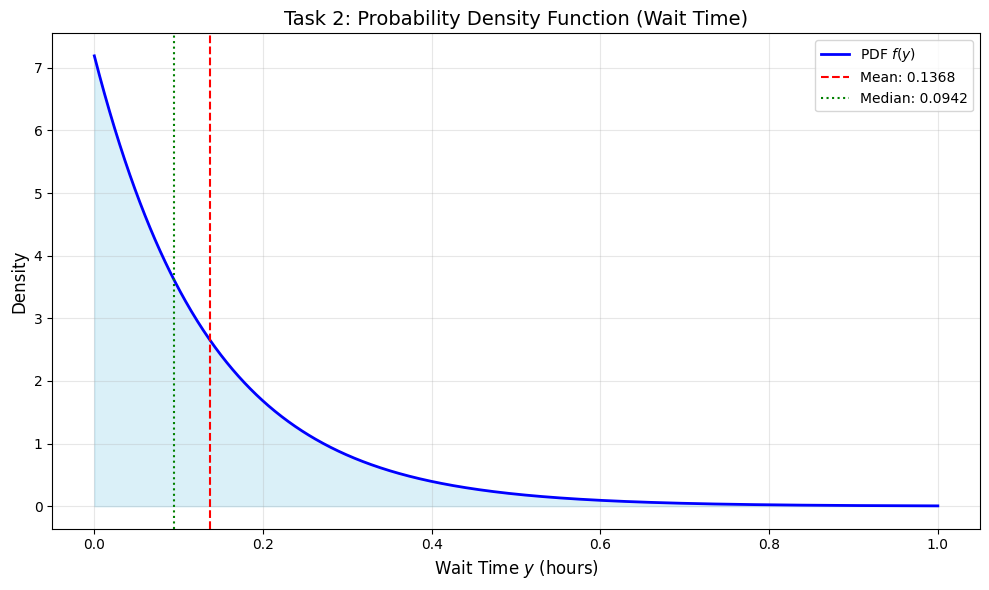

Probability P(2 < Y < 4): 6.3627e-07
Expectation E[Y]: 0.1368
Variance Var(Y): 0.0192
Quartile Q1: 0.0382
Median (Q2): 0.0942
Quartile Q3: 0.1900


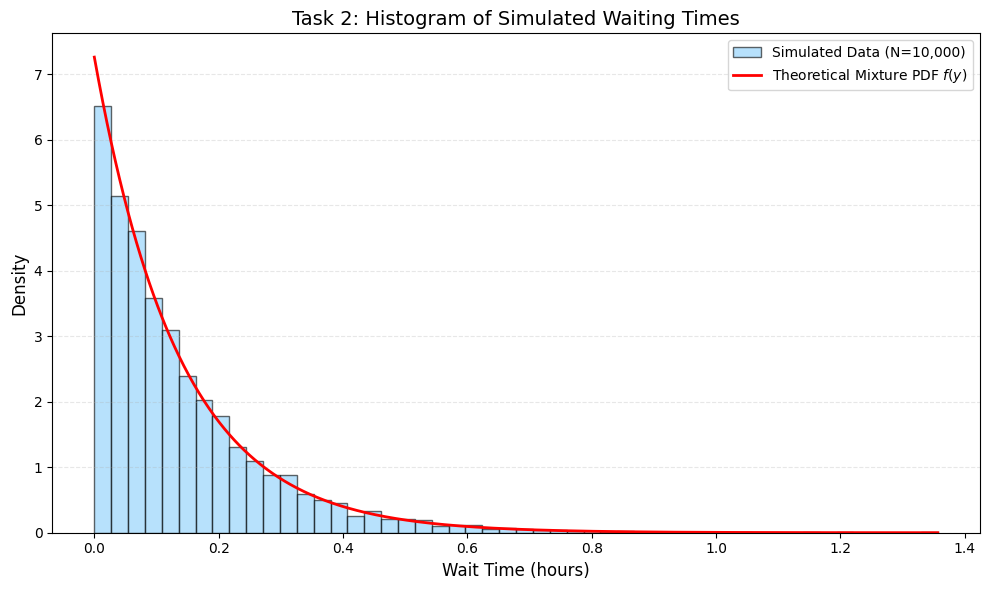

Simulated Mean: 0.1402
Theoretical Mean: 0.1382


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# --- 1. PARAMETERS (Updated) ---
xi4 = 2
xi5 = 0.73
xi6 = 7
xi7 = 0.26
xi8 = 8

# Survival function S(y)
def S(y):
    return xi5 * np.exp(-xi6 * y) + xi7 * np.exp(-xi8 * y)

# PDF f(y) = -S'(y)
def f(y):
    return xi5 * xi6 * np.exp(-xi6 * y) + xi7 * xi8 * np.exp(-xi8 * y)

# --- 2. CALCULATIONS ---

# Probability P(2 < Y < 4)
prob_2_4 = S(2) - S(4)

# Expectation E[Y] = xi5/xi6 + xi7/xi8
mean_y = (xi5 / xi6) + (xi7 / xi8)

# Variance Var(Y) = E[Y^2] - (E[Y])^2
# E[Y^2] = 2 * (xi5/xi6^2 + xi7/xi8^2)
mean_y_sq = 2 * (xi5 / (xi6**2) + xi7 / (xi8**2))
var_y = mean_y_sq - mean_y**2

# Quartiles (Solving S(y) = p)
q1 = fsolve(lambda y: S(y) - 0.75, 0.1)[0]
q2 = fsolve(lambda y: S(y) - 0.50, 0.1)[0] # Median
q3 = fsolve(lambda y: S(y) - 0.25, 0.2)[0]

# --- 3. VISUALIZATION ---
y_vals = np.linspace(0, 1, 1000)
f_vals = f(y_vals)

plt.figure(figsize=(10, 6))
plt.plot(y_vals, f_vals, label='PDF $f(y)$', color='blue', lw=2)
plt.fill_between(y_vals, f_vals, color='skyblue', alpha=0.3)

# Mark Mean and Median
plt.axvline(mean_y, color='red', linestyle='--', label=f'Mean: {mean_y:.4f}')
plt.axvline(q2, color='green', linestyle=':', label=f'Median: {q2:.4f}')

plt.title('Task 2: Probability Density Function (Wait Time)', fontsize=14)
plt.xlabel('Wait Time $y$ (hours)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 4. OUTPUT RESULTS ---
print(f"Probability P(2 < Y < 4): {prob_2_4:.4e}")
print(f"Expectation E[Y]: {mean_y:.4f}")
print(f"Variance Var(Y): {var_y:.4f}")
print(f"Quartile Q1: {q1:.4f}")
print(f"Median (Q2): {q2:.4f}")
print(f"Quartile Q3: {q3:.4f}")

import numpy as np
import matplotlib.pyplot as plt

# --- 1. PARAMETERS FOR TASK 2 (Updated) ---
xi5 = 0.73
xi6 = 7
xi7 = 0.26
xi8 = 8
total_w = xi5 + xi7 # Weights: 0.73 + 0.26 = 0.99

# --- 2. SIMULATION ---
N = 10000
np.random.seed(42)

# Select components based on relative weights
# p1 = 0.73/0.99, p2 = 0.26/0.99
component = np.random.choice([0, 1], size=N, p=[xi5/total_w, xi7/total_w])

# Generate samples: scale = 1 / lambda
samples = np.where(component == 0,
                   np.random.exponential(1/xi6, size=N),
                   np.random.exponential(1/xi8, size=N))

# --- 3. THEORETICAL PDF ---
y_range = np.linspace(0, max(samples), 1000)
# PDF formula normalized by total weight
f_theory = (xi5 * xi6 * np.exp(-xi6 * y_range) + xi7 * xi8 * np.exp(-xi8 * y_range)) / total_w

# --- 4. VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Plot Histogram
plt.hist(samples, bins=50, density=True, color='lightskyblue',
         edgecolor='black', alpha=0.6, label='Simulated Data (N=10,000)')

# Overlay Theoretical PDF
plt.plot(y_range, f_theory, color='red', lw=2, label='Theoretical Mixture PDF $f(y)$')

plt.title('Task 2: Histogram of Simulated Waiting Times', fontsize=14)
plt.xlabel('Wait Time (hours)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics comparison
print(f"Simulated Mean: {np.mean(samples):.4f}")
print(f"Theoretical Mean: {(xi5/xi6 + xi7/xi8)/total_w:.4f}")

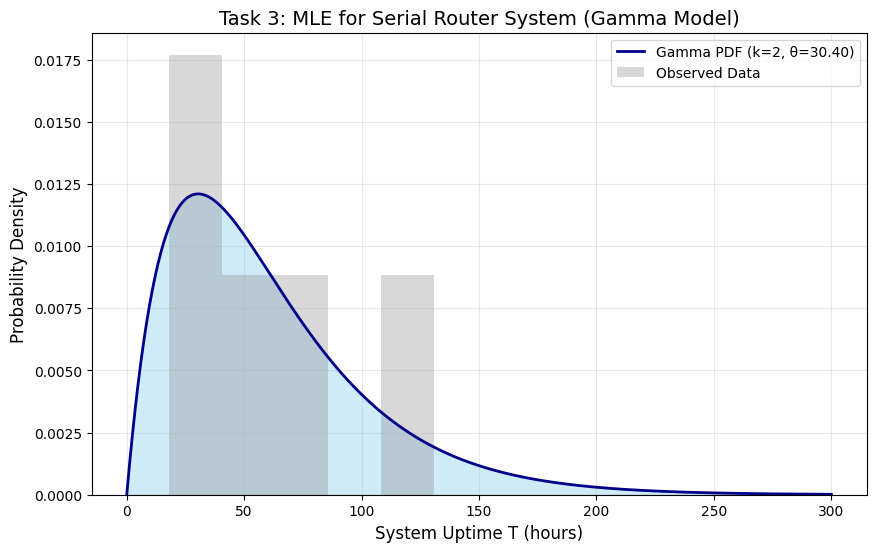

Sample Mean: 60.8
Maximum Likelihood Estimate (theta): 30.4000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# --- 1. DATA AND PARAMETERS ---
data = np.array([18, 131, 25, 76, 54])
k = 2  # Number of routers in series
sample_mean = np.mean(data)

# --- 2. MLE CALCULATION ---
theta_hat = sample_mean / k

# --- 3. VISUALIZATION ---
t_range = np.linspace(0, 300, 1000)
# Scipy Gamma: a is shape, scale is theta
pdf_values = gamma.pdf(t_range, a=k, scale=theta_hat)

plt.figure(figsize=(10, 6))
plt.plot(t_range, pdf_values, color='darkblue', lw=2, label=f'Gamma PDF (k=2, θ={theta_hat:.2f})')
plt.fill_between(t_range, pdf_values, color='skyblue', alpha=0.4)
plt.hist(data, bins=5, density=True, alpha=0.3, color='gray', label='Observed Data')

plt.title('Task 3: MLE for Serial Router System (Gamma Model)', fontsize=14)
plt.xlabel('System Uptime T (hours)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Sample Mean: {sample_mean}")
print(f"Maximum Likelihood Estimate (theta): {theta_hat:.4f}")

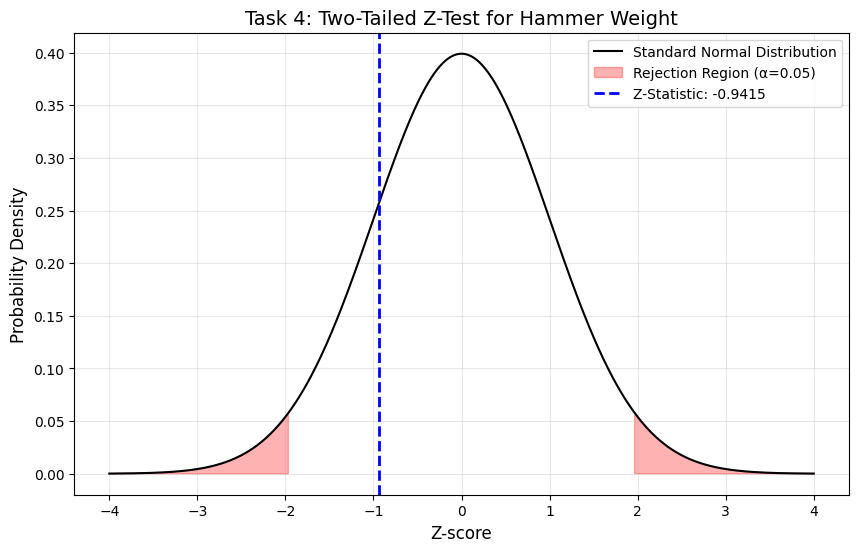

Sample Mean: 866.9
Z-Statistic: -0.9415
p-value: 0.3465


In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# --- 1. PARAMETERS ---
mu_0 = 880
sigma = 44
data = np.array([868, 736, 762, 897, 809, 890, 1012, 901, 946, 848])
n = len(data)
alpha = 0.05

# --- 2. CALCULATIONS ---
sample_mean = np.mean(data)
z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# --- 3. VISUALIZATION ---
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='black')

# Highlight rejection regions for alpha = 0.05
z_crit = norm.ppf(1 - alpha/2)
plt.fill_between(x, y, where=(x >= z_crit) | (x <= -z_crit), color='red', alpha=0.3, label='Rejection Region (α=0.05)')

# Mark the test statistic
plt.axvline(z_stat, color='blue', linestyle='--', lw=2, label=f'Z-Statistic: {z_stat:.4f}')

plt.title('Task 4: Two-Tailed Z-Test for Hammer Weight', fontsize=14)
plt.xlabel('Z-score', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Sample Mean: {sample_mean}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

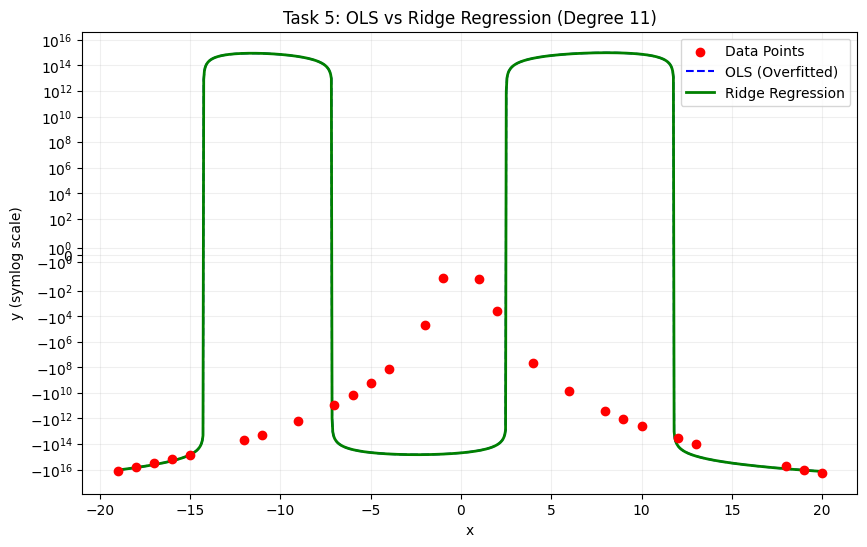

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. DATA ENTRY ---
data = [(19, -10233244378829096), (2, -3937.38), (-11, -18458202657829.62),
        (20, -17819891633986530), (-15, -718181747385985.4), (6, -7366021921.99),
        (4, -44050213.24), (-7, -88902661716.27), (-18, -6711830463838900),
        (-17, -3365082801405407.5), (12, -37349866643220.66), (-12, -51455409330874.12),
        (-6, -14773945893.53), (-9, -1703754093828.18), (1, -11.99),
        (-4, -135200126.97), (9, -1064816845393.58), (13, -97589644727233.92),
        (-19, -11973504784548742), (-16, -1605192160890619), (-5, -1836296544.99),
        (18, -5015003750002198), (10, -4075495041878.25), (8, -266880119004.75),
        (-1, -10.43), (-2, -49847.64)]

x = np.array([d[0] for d in data])
y = np.array([d[1] for d in data])

# --- 2. MODEL FITTING ---
degree = 11
X = np.column_stack([x**i for i in range(degree + 1)])

# OLS Estimate
theta_ols = np.linalg.solve(X.T @ X, X.T @ y)

# Ridge Estimate (lambda = 1e-5)
lam = 1e-5
theta_ridge = np.linalg.solve(X.T @ X + lam * np.eye(degree + 1), X.T @ y)

# --- 3. VISUALIZATION ---
x_plot = np.linspace(min(x), max(x), 1000)
X_plot = np.column_stack([x_plot**i for i in range(degree + 1)])
y_ols = X_plot @ theta_ols
y_ridge = X_plot @ theta_ridge

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data Points', zorder=5)
plt.plot(x_plot, y_ols, '--', label='OLS (Overfitted)', color='blue')
plt.plot(x_plot, y_ridge, label='Ridge Regression', color='green', lw=2)

plt.yscale('symlog') # Symmetric log scale due to extreme range
plt.title('Task 5: OLS vs Ridge Regression (Degree 11)')
plt.xlabel('x')
plt.ylabel('y (symlog scale)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

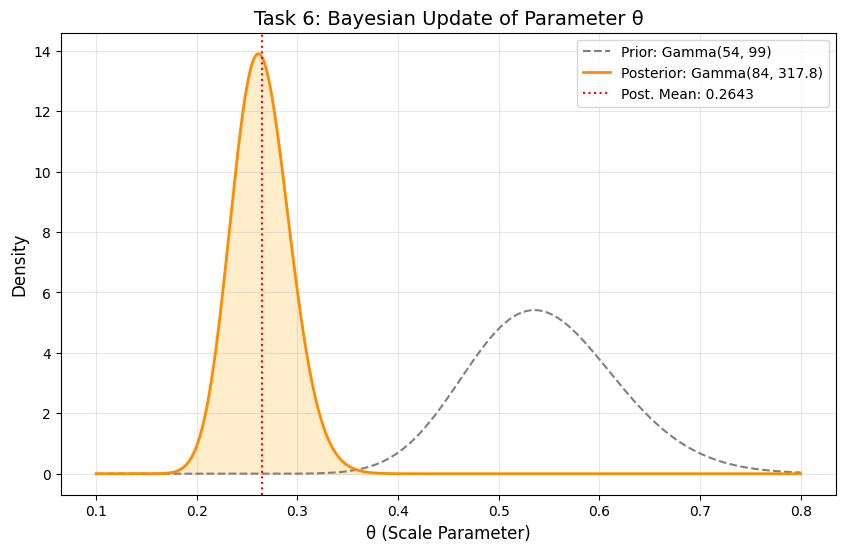

Posterior Mean: 0.2643
Posterior Median: 0.2633
Posterior Mode: 0.2612


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# --- 1. PARAMETERS ---
alpha_prior = 54
beta_prior = 99
n = 10
alpha_likelihood = 3
sample_mean = 21.88
sum_x = n * sample_mean

# --- 2. POSTERIOR UPDATE ---
alpha_post = alpha_prior + (n * alpha_likelihood)
beta_post = beta_prior + sum_x

# Point Estimates
post_mean = alpha_post / beta_post
post_median = gamma.ppf(0.5, a=alpha_post, scale=1/beta_post)
post_mode = (alpha_post - 1) / beta_post

# --- 3. VISUALIZATION ---
theta_range = np.linspace(0.1, 0.8, 1000)
prior_pdf = gamma.pdf(theta_range, a=alpha_prior, scale=1/beta_prior)
post_pdf = gamma.pdf(theta_range, a=alpha_post, scale=1/beta_post)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior_pdf, label=f'Prior: Gamma({alpha_prior}, {beta_prior})', color='gray', linestyle='--')
plt.plot(theta_range, post_pdf, label=f'Posterior: Gamma({alpha_post}, {beta_post:.1f})', color='darkorange', lw=2)
plt.fill_between(theta_range, post_pdf, color='orange', alpha=0.2)

# Mark the mean
plt.axvline(post_mean, color='red', linestyle=':', label=f'Post. Mean: {post_mean:.4f}')

plt.title('Task 6: Bayesian Update of Parameter θ', fontsize=14)
plt.xlabel('θ (Scale Parameter)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Posterior Mean: {post_mean:.4f}")
print(f"Posterior Median: {post_median:.4f}")
print(f"Posterior Mode: {post_mode:.4f}")